### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [75]:
%pip install tensorflow
%pip install keras

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [76]:
import tensorflow as tf
import keras

In [77]:
print("Tensorflow Version:",tf.__version__)
print("Keras Version:",keras.__version__)

Tensorflow Version: 2.13.0
Keras Version: 2.13.1


### Q2. Load the Wine Quality dataset and explore its dimensions.Dataset link:https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [78]:
import pandas as pd

In [79]:
data=pd.read_csv('winequality.csv')

In [80]:
print("Dimension of the given dataset:",data.shape)

Dimension of the given dataset: (1599, 12)


### Q3. Check for null values, identify categorical variables, and encode them.

In [81]:
## cheking null values
data.isnull().sum().sum()

0

In [82]:
# identify categorical variables
cat_vars=data.select_dtypes(include='object').columns.tolist()

In [83]:
print("Categorical vriables:",cat_vars)

Categorical vriables: []


In this datasets neither present null values nor present categorical variables

### Q4. Separate the features and target variables from the dataframe.

In [84]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [130]:
target_cols='quality'
x=data.drop(columns=target_cols,axis=1) # seprate the features from the dataset
y=data[target_cols] #seprate the target from the dataset
y=y.map({0:0,1:0,2:0,3:0,4:0,5:0,6:1,7:1,8:1,9:1,10:1})

### Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
# split the datasets in to train and test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [133]:
# split the dataset in to train and validation set
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

### Q6. Perform scaling on the dataset.

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler=StandardScaler()

In [136]:
X_train_scaled=scaler.fit_transform(X_train) # Scalled train data
X_val_scaled=scaler.transform(X_val) # Scaled validation data
X_test_scaled=scaler.transform(X_test) # Scaled test data

### Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [137]:
from keras.models import Sequential
from keras.layers import Dense

In [138]:
model=Sequential()

In [139]:
# creating Hidden layers
model.add(Dense(units=128,activation='relu',input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=64,activation='relu'))

In [140]:
model.add(Dense(units=1,activation='softmax')) # Output layers

### Q8. Create a Sequential model and add all the layers to it.

In [141]:
model=Sequential()
model.add(Dense(units=128,activation='relu',input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='softmax')) # Output layers

### Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [142]:
from keras.callbacks import TensorBoard

In [143]:
# compile the model before adding callback
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [144]:
tensorboard_callback=TensorBoard(log_dir='./log',histogram_freq=1)

In [145]:
model.fit(X_train_scaled,y_train,callbacks=[tensorboard_callback])

32/32 [==============================] - 1s 4ms/step - loss: 0.5976 - accuracy: 0.5425


### Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed.

In [146]:
from keras.callbacks import EarlyStopping

In [147]:
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [148]:
model.fit(X_train_scaled,y_train,callbacks=[early_stopping_callback])

32/32 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.5425


### Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training.

In [149]:
from keras.callbacks import ModelCheckpoint

In [150]:
model_checkpoint_callback=ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

In [151]:
model.fit(X_train_scaled,y_train,callbacks=[model_checkpoint_callback])

32/32 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.5425


### Q12. Print the model summary.

In [152]:
# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               1536      
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [153]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Q14. Compile the model with the specified loss function, optimizer, and metrics.

In [154]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.

In [155]:
history=model.fit(X_train_scaled,y_train,batch_size=64,epochs=100,validation_data=(X_val_scaled,y_val),callbacks=[tensorboard_callback,early_stopping_callback,model_checkpoint_callback])

Epoch 1/100
16/16 [==============================] - 1s 20ms/step - loss: 0.4969 - accuracy: 0.5425 - val_loss: 0.5255 - val_accuracy: 0.4727
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4865 - accuracy: 0.5425 - val_loss: 0.5305 - val_accuracy: 0.4727
Epoch 3/100
 1/16 [>.............................] - ETA: 0s - loss: 0.3911 - accuracy: 0.5312

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 0s 8ms/step - loss: 0.4787 - accuracy: 0.5425 - val_loss: 0.5288 - val_accuracy: 0.4727
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.4699 - accuracy: 0.5425 - val_loss: 0.5295 - val_accuracy: 0.4727
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4650 - accuracy: 0.5425 - val_loss: 0.5298 - val_accuracy: 0.4727
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4605 - accuracy: 0.5425 - val_loss: 0.5317 - val_accuracy: 0.4727


### Q16. Get the model's parameters.

In [156]:
# Get the model's parameters
model_params = model.get_weights()

In [157]:
model_params

[array([[-0.06066931, -0.14578122,  0.06531814, ..., -0.12167258,
         -0.06276134,  0.02455359],
        [-0.15272614,  0.1315262 ,  0.07995518, ..., -0.12592855,
         -0.07710034,  0.17607823],
        [-0.16398712, -0.01931824,  0.0640099 , ..., -0.19740029,
          0.19118452,  0.05894719],
        ...,
        [-0.04084614,  0.18435796, -0.03261876, ...,  0.02473263,
         -0.08968369,  0.00513299],
        [ 0.06468167, -0.2181557 , -0.16950218, ...,  0.05893707,
          0.04004785, -0.02203499],
        [ 0.06427471,  0.1068516 , -0.2071054 , ...,  0.01466282,
          0.15049231, -0.11600223]], dtype=float32),
 array([ 1.9813353e-02, -1.1219282e-02,  9.1753742e-03,  4.2532561e-03,
         2.1377441e-03, -2.9818311e-03,  2.7403638e-02, -3.2845279e-03,
        -4.4942413e-02,  3.2014694e-02,  1.4285699e-02,  1.5817361e-02,
        -1.1690047e-03,  2.6102641e-03,  5.2071055e-03, -1.2568193e-02,
        -2.8757839e-03,  1.0278175e-02,  3.2421377e-02, -1.9474315e-02

### Q17. Store the model's training history as a Pandas DataFrame.

In [158]:
# Store the model's training history as a Pandas DataFrame
history_df = pd.DataFrame(history.history)

### Q18. Plot the model's training history.

In [159]:
import matplotlib.pyplot as plt

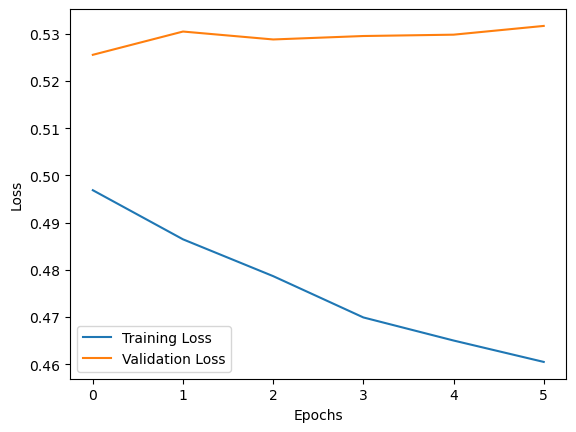

In [160]:
# Plot the training and validation loss over epochs
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

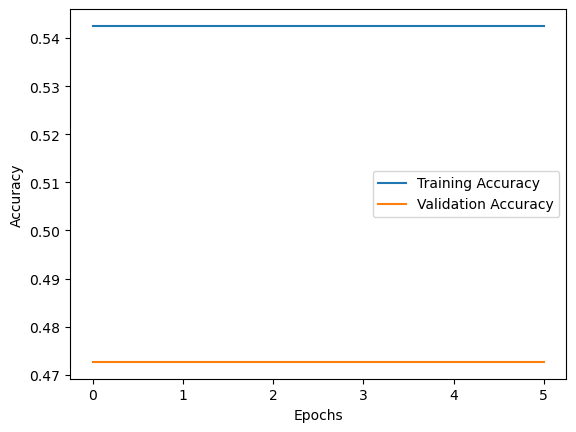

In [161]:
# Plot the training and validation accuracy over epochs
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Q19. Evaluate the model's performance using the test data.

In [162]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.5594
Test Loss: 0.5111593008041382
Test Accuracy: 0.559374988079071
